# Preprocessing of the three parliamentary dialogue sources

This notebook contains the preprocessing pipeline for 

- ParlaMint 3.0
- Danish Parliament Corpus V1
- ParlSpeech

The output is a merged df consisting of the whole 1997-2022 time range they cover when concatenated end-to-end, and this df is preprocessed to prepare for making BERT embeddings.

The end of this notebook also includes some light visualisations for exploration purposes.

In [ ]:
data_directory = "/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/predicting_manifesto_alignment/data"

## Preprocessing ParlaMint 3.0

The present notebook preprocesses the following data files for parliamentary dialogue: 
- ParlaMint 3.0

Source for the data is listed in the paper coupled with the present repository.

### Read in and inspect

In [2]:
import pandas as pd

# Read in data
file_path = f"{data_directory}/raw/parliamentary_dialogue/parlamint3/parlamint3.csv"
parlamint3 = pd.read_csv(file_path)

# Add a column called source
parlamint3['Source_data'] = "ParlaMint3"

# Ensure date format and extract the year and year-month
parlamint3['Date'] = pd.to_datetime(parlamint3['Date'])
parlamint3['Year'] = parlamint3['Date'].dt.year
parlamint3['YearMonth'] = parlamint3['Date'].dt.to_period('M')

# Renaming
parlamint3.rename(columns={'Title': 'Title_of_proceeding'}, inplace=True)

# Ensure formatting
parlamint3['text'] = parlamint3['text'].astype(str)

# Checking for NaN values
text_nan_count = parlamint3['text'].isna().sum()
party_nan_count = parlamint3['Speaker_party_name'].isna().sum()
print(f"NaN in 'text': {text_nan_count}")
print(f"NaN in 'Speaker_party_name': {party_nan_count}")

# Removing rows where 'text' or 'Speaker_party_name' is NaN
parlamint3 = parlamint3.dropna(subset=['text', 'Speaker_party_name'])

# What is the date range? 
date_range = parlamint3['Date'].agg(['min', 'max'])
print(f"Date range of ParlaMint3 is {date_range}")

# How many parties do we have? 
numb_parties = parlamint3['Speaker_party_name'].nunique()
print(f"ParlaMint3 contains {numb_parties} parties.")

# Drop columns starting with 'Unnamed'
parlamint3 = parlamint3.loc[:, ~parlamint3.columns.str.startswith('Unnamed')]

# Take a final look
parlamint3

NaN in 'text': 0
NaN in 'Speaker_party_name': 139
Date range of ParlaMint3 is min   2014-10-07
max   2022-06-07
Name: Date, dtype: datetime64[ns]
ParlaMint3 contains 19 parties.


,ID,Title_of_proceeding,Date,Body,Term,Session,Meeting,Sitting,Agenda,Subcorpus,...,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,text,Source_data,Year,YearMonth
0,ParlaMint-DK_20141007120002,Hansard of the session of the Danish Parliamen...,2014-10-07,Unicameralism,NaN,20141.0,1.0,NaN,NaN,Reference,...,V,Venstre,Opposition,"Haarder, Bertel",M,1944,Mødet er åbnet. 164 gange er Folketinget trådt...,ParlaMint3,2014,2014-10
1,ParlaMint-DK_20141007120050,Hansard of the session of the Danish Parliamen...,2014-10-07,Unicameralism,NaN,20141.0,1.0,NaN,NaN,Reference,...,V,Venstre,Opposition,"Haarder, Bertel",M,1944,Til formand har samtlige grupper indstillet hr...,ParlaMint3,2014,2014-10
2,ParlaMint-DK_20141007120119,Hansard of the session of the Danish Parliamen...,2014-10-07,Unicameralism,NaN,20141.0,1.0,NaN,NaN,Reference,...,V,Venstre,Opposition,"Haarder, Bertel",M,1944,Vedrørende valg af næstformænd er situationen ...,ParlaMint3,2014,2014-10
3,ParlaMint-DK_20141007120438,Hansard of the session of the Danish Parliamen...,2014-10-07,Unicameralism,NaN,20141.0,1.0,NaN,NaN,Reference,...,V,Venstre,Opposition,"Haarder, Bertel",M,1944,Til tingsekretærer er i henhold til de indgåed...,ParlaMint3,2014,2014-10
4,ParlaMint-DK_20141007120520,Hansard of the session of the Danish Parliamen...,2014-10-07,Unicameralism,NaN,20141.0,1.0,NaN,NaN,Reference,...,S,Socialdemokratiet,Coalition,"Lykketoft, Mogens",M,1946,"Jeg vil gerne takke for den tillid, kollegerne...",ParlaMint3,2014,2014-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398605,ParlaMint-DK_20220607220032,Hansard of the session of the Danish Parliamen...,2022-06-07,Unicameralism,NaN,NaN,NaN,NaN,NaN,War,...,S,Socialdemokratiet,Coalition,"Roug, Kasper",M,1979,"Tak til formanden. Det er nogle gange sådan, a...",ParlaMint3,2022,2022-06
398606,ParlaMint-DK_20220607220149,Hansard of the session of the Danish Parliamen...,2022-06-07,Unicameralism,NaN,NaN,NaN,NaN,NaN,War,...,RV,Radikale Venstre,NaN,"Petersen, Rasmus Helveg",M,1968,"Mange tak til ordføreren. Må jeg få teksten, s...",ParlaMint3,2022,2022-06
398607,ParlaMint-DK_20220607220213,Hansard of the session of the Danish Parliamen...,2022-06-07,Unicameralism,NaN,NaN,NaN,NaN,NaN,War,...,RV,Radikale Venstre,NaN,"Robsøe, Katrine",F,1991,"Tak for det, og tusind tak til alle ordførerne...",ParlaMint3,2022,2022-06
398608,ParlaMint-DK_20220607220510,Hansard of the session of the Danish Parliamen...,2022-06-07,Unicameralism,NaN,NaN,NaN,NaN,NaN,War,...,RV,Radikale Venstre,NaN,"Petersen, Rasmus Helveg",M,1968,Mange tak til den radikale ordfører. Der er ik...,ParlaMint3,2022,2022-06


In [3]:
# Save
parlamint3.to_csv(f"/{data_directory}/preprocessed/clean/clean_parlamint3.csv") 

## Preprocessing the Danish Parliament Corpus

The following section preprocesses the following data files for parliamentary dialogue: 
- Danish Parliament Corpus

Source for the data is listed in the paper coupled with the present repository.

In [4]:
# Unzip zip files
from utils import unpack_zip_files

directory_path = f"{data_directory}/raw/parliamentary_dialogue/danish_parliament_corpus/The Danish Parliament Corpus 2009 - 2017, v2, w. subject annotation"

unpack_zip_files(directory_path)

# Now that they're unzipped, find files and concatenate
from utils import find_files, read_and_concatenate

# Find all files that match the pattern we need
files = list(find_files(directory_path, '_helemoedet-memberinfo-subjects.txt'))

# Read and concatenate, remove duplicates
dpc = read_and_concatenate(files)

dpc = dpc.drop_duplicates()

# Add a column called source like for Parlamint 3.0
dpc['Source_data'] = "Danish_Parliament_Corpus"

# Rename some columns (matching Danish Parl Corpus to ParlaMint3, so renaming Danish Parl Corpus)
dpc.rename(columns={
    #'old_name1': 'new_name1',
    'Title': 'Speaker_title',
    'Agenda title': 'Agenda',
    'Name': 'Speaker_name',
    'Gender': 'Speaker_gender',
    'Party': 'Speaker_party',  # Changing to full name later
    'Role': 'Speaker_role',
    'Birth': 'Speaker_birth',
    'Text': 'text',

}, inplace=True)

# Ensure date format
dpc['Date'] = pd.to_datetime(dpc['Date'])

# Extract the year from the 'Date' column
dpc['Year'] = dpc['Date'].dt.year

# What is the date range? 
date_range = dpc['Date'].agg(['min', 'max'])
print(f"Date range Danish Parliament Corpus data is {date_range}")

# How many parties do we have? 
numb_parties = dpc['Speaker_party'].nunique()
print(f" Danish Parliament Corpus contains {numb_parties} parties.")

# Taking a look
dpc

Unpacked 20161.zip into 20161
Unpacked 20111.zip into 20111
Unpacked 20102.zip into 20102
Unpacked 20101.zip into 20101
Unpacked 20131.zip into 20131
Unpacked 20091.zip into 20091
Unpacked 20121.zip into 20121
Unpacked 20151.zip into 20151
Unpacked 20141.zip into 20141
Unpacked 20142.zip into 20142
Date range Danish Parliament Corpus data is min   2009-10-06
max   2017-09-07
Name: Date, dtype: datetime64[ns]
 Danish Parliament Corpus contains 17 parties.


,ID,Date,Start time,End time,Time,Agenda item,Case no,Case type,Agenda,Subject 1,...,Speaker_name,Speaker_gender,Speaker_party,Speaker_role,Speaker_title,Speaker_birth,Age,text,Source_data,Year
0,20091105100016,2009-11-05,10:00:16,10:01:08,52,2009-11-05-0,0,FM,Punkt 0,other,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,Mødet er åbnet. I dag er der følgende anmeldel...,Danish_Parliament_Corpus,2009
1,20091105100108,2009-11-05,10:01:08,10:01:28,20,2009-11-05-1,13,F,Fremme af F 13: Om helhedsskoler.,Education,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,Hvis ingen gør indsigelse mod fremme af denne ...,Danish_Parliament_Corpus,2009
2,20091105100128,2009-11-05,10:01:28,10:01:53,25,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,"Den første, der får ordet, er hr. Karsten Laur...",Danish_Parliament_Corpus,2009
3,20091105100153,2009-11-05,10:01:53,10:03:56,123,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,Karsten Lauritzen,Male,V,medlem,nil,1983-10-14,26,"Tak. Normalt er det jo oppositionspartierne, d...",Danish_Parliament_Corpus,2009
4,20091105100356,2009-11-05,10:03:56,10:04:13,17,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,Tak til hr. Karsten Lauritzen for begrundelsen...,Danish_Parliament_Corpus,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380676,20131023135541,2013-10-23,13:55:41,13:56:20,39,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Karsten Lauritzen,Male,V,medlem,nil,1983-10-14,30,"Jeg vil først kvittere for, at ministeren nu h...",Danish_Parliament_Corpus,2013
380677,20131023135620,2013-10-23,13:56:20,13:56:22,2,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Mogens Lykketoft,Male,S,formand,Formanden,1946-01-09,67,Skatteministeren.,Danish_Parliament_Corpus,2013
380678,20131023135622,2013-10-23,13:56:22,13:57:27,65,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Holger K. Nielsen,Male,SF,minister,Skatteministeren,1950-04-23,63,"Undskyld, jeg synes altså, det er noget platte...",Danish_Parliament_Corpus,2013
380679,20131023135727,2013-10-23,13:57:27,13:57:32,5,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Mogens Lykketoft,Male,S,formand,Formanden,1946-01-09,67,Spørgsmålet er sluttet. Tak til skatteminister...,Danish_Parliament_Corpus,2013


In [5]:
# Save
dpc.to_csv(f"{data_directory}/preprocessed/clean/clean_danish_parliament_corpus.csv") 

## Preprocessing ParlSpeech

The following section preprocesses the following data files for parliamentary dialogue: 
- ParlSpeech

Source for the data is listed in the paper coupled with the present repository.

In [6]:
import pandas as pd

parlspeech = pd.read_csv(f"{data_directory}/raw/parliamentary_dialogue/parlspeech/Corp_Folketing_V2.csv")

# Drop cols if they start with unnamed
parlspeech = parlspeech.loc[:, ~parlspeech.columns.str.startswith('Unnamed')]

# Renaming to merge with other dataset
parlspeech = parlspeech.rename(columns={"date":"Date",
                                        "speaker":"Speaker_name",
                                        "party": "Speaker_party",
                                        "agenda": "Agenda_colFromDPC"}) # renaming to DPC

# Drop rows in Speaker_name if 'Formanden'
parlspeech = parlspeech[parlspeech['Speaker_name'] != 'Formanden']

# Drop rows if chair = True
parlspeech = parlspeech[parlspeech['chair'] != True]

# Core fix here: Ny Alliance is the former Liberal Alliance, so changing the name
replacements_short_names = {
      
      # Is : should be
    'NY': 'LA',
}

# Replace values in Speaker_party column
parlspeech['Speaker_party'] = parlspeech['Speaker_party'].replace(replacements_short_names)

# What is the date range? 
date_range = parlspeech['Date'].agg(['min', 'max'])
print(f"Date range Parlspeech data is {date_range}")

# How many parties do we have? 
numb_parties = parlspeech['Speaker_party'].nunique()
print(f"Parlspeech contains {numb_parties} parties.")

# Take a look
parlspeech

Date range Parlspeech data is min    1997-10-07
max    2018-12-20
Name: Date, dtype: object
Parlspeech contains 24 parties.


,Date,Agenda_colFromDPC,speechnumber,Speaker_name,Speaker_party,party.facts.id,chair,terms,text,parliament,iso3country
2,1997-10-07,Statsministerens redegørelse i henhold til gru...,3,Poul Nyrup Rasmussen,S,379.0,False,18662,For 25 år siden sagde et flertal i befolkninge...,DK-Folketing,DNK
4,1997-10-09,2) Forhandling om redegørelse nr. R 1.,3,Torben Lund,S,379.0,False,2865,Vi står over for en meget afgørende folketings...,DK-Folketing,DNK
6,1997-10-09,2) Forhandling om redegørelse nr. R 1.,5,Frank Aaen,EL,1527.0,False,159,Hr. Torben Lund taler om indgreb imod det stig...,DK-Folketing,DNK
7,1997-10-09,2) Forhandling om redegørelse nr. R 1.,6,Pia Kjærsgaard,DF,1022.0,False,195,Ligesom i åbningstalen kom udlændingeafsnittet...,DK-Folketing,DNK
8,1997-10-09,2) Forhandling om redegørelse nr. R 1.,7,Kristian Thulesen Dahl,DF,1022.0,False,202,"Jeg kan forstå, at udlændingepolitikken er kra...",DK-Folketing,DNK
...,...,...,...,...,...,...,...,...,...,...,...
772147,2018-12-20,3. behandling af lovforslag nr. L 107: Forsl...,302,Lotte Rod,RV,1507.0,False,110,"Vi bakker op om det her forslag, fordi vi syne...",DK-Folketing,DNK
772149,2018-12-20,3. behandling af lovforslag nr. L 107: Forsl...,304,Lisbeth Bech Poulsen,SF,329.0,False,144,"Al respekt for fru Lotte Rods opfordring, men ...",DK-Folketing,DNK
772151,2018-12-20,3. behandling af lovforslag nr. L 107: Forsl...,306,Lotte Rod,RV,1507.0,False,175,Man kan jo grundlæggende have to tilgange til ...,DK-Folketing,DNK
772165,2018-12-20,2. (sidste) behandling af beslutningsforslag ...,320,Holger K. Nielsen,SF,329.0,False,268,"Om lidt vil der være et flertal, som stemmer d...",DK-Folketing,DNK


In [7]:
# Save
parlspeech.to_csv(f"{data_directory}/preprocessed/clean/clean_parlspeech.csv")

## Merging all files

#### 1) Merging ParlaMint3 and DPC

Inspecting the data shows that we should take rows from DPC up until 2014-10-07 (YYYY-MM-DD) where they begin to overlap. We keep all columns, suffix with their source and fill with NAs for those non available to have a master merged file.

#### 2) Lastly merging ParlSpeech on

Inspecting the data shows that we should take rows from danish_parliament_corpus up until 2014-10-07 (YYYY-MM-DD) where they begin to overlap. We keep all columns, suffix with their source and fill with NAs for those non available to have a master merged file.

In [8]:
import pandas as pd

# Dropping columns that contain only NaN values
parlamint3.dropna(axis='columns', how='all', inplace=True)
dpc.dropna(axis='columns', how='all', inplace=True)
parlspeech.dropna(axis='columns', how='all', inplace=True)

# Ensure date format
parlamint3['Date'] = pd.to_datetime(parlamint3['Date'])
dpc['Date'] = pd.to_datetime(dpc['Date'])
parlspeech['Date'] = pd.to_datetime(parlspeech['Date'])


In [9]:
# -- Merge ParlaMint3 and DPC: Take up until 2014-10-07 from DPC

# Filter the df to include only rows on or before '2014-10-07'
cutoff_date = pd.Timestamp('2014-10-07')

filtered_dpc = dpc[dpc['Date'] < cutoff_date] # Not including the actual date

# Take a look
filtered_dpc

,ID,Date,Start time,End time,Time,Agenda item,Case no,Case type,Agenda,Subject 1,...,Speaker_name,Speaker_gender,Speaker_party,Speaker_role,Speaker_title,Speaker_birth,Age,text,Source_data,Year
0,20091105100016,2009-11-05,10:00:16,10:01:08,52,2009-11-05-0,0,FM,Punkt 0,other,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,Mødet er åbnet. I dag er der følgende anmeldel...,Danish_Parliament_Corpus,2009
1,20091105100108,2009-11-05,10:01:08,10:01:28,20,2009-11-05-1,13,F,Fremme af F 13: Om helhedsskoler.,Education,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,Hvis ingen gør indsigelse mod fremme af denne ...,Danish_Parliament_Corpus,2009
2,20091105100128,2009-11-05,10:01:28,10:01:53,25,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,"Den første, der får ordet, er hr. Karsten Laur...",Danish_Parliament_Corpus,2009
3,20091105100153,2009-11-05,10:01:53,10:03:56,123,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,Karsten Lauritzen,Male,V,medlem,nil,1983-10-14,26,"Tak. Normalt er det jo oppositionspartierne, d...",Danish_Parliament_Corpus,2009
4,20091105100356,2009-11-05,10:03:56,10:04:13,17,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,Thor Pedersen,Male,V,formand,Formanden,1945-06-14,64,Tak til hr. Karsten Lauritzen for begrundelsen...,Danish_Parliament_Corpus,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380676,20131023135541,2013-10-23,13:55:41,13:56:20,39,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Karsten Lauritzen,Male,V,medlem,nil,1983-10-14,30,"Jeg vil først kvittere for, at ministeren nu h...",Danish_Parliament_Corpus,2013
380677,20131023135620,2013-10-23,13:56:20,13:56:22,2,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Mogens Lykketoft,Male,S,formand,Formanden,1946-01-09,67,Skatteministeren.,Danish_Parliament_Corpus,2013
380678,20131023135622,2013-10-23,13:56:22,13:57:27,65,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Holger K. Nielsen,Male,SF,minister,Skatteministeren,1950-04-23,63,"Undskyld, jeg synes altså, det er noget platte...",Danish_Parliament_Corpus,2013
380679,20131023135727,2013-10-23,13:57:27,13:57:32,5,2013-10-23-1-5,221,S,Spm. nr. S 221: Om Kommissionens godkendelse a...,Economy,...,Mogens Lykketoft,Male,S,formand,Formanden,1946-01-09,67,Spørgsmålet er sluttet. Tak til skatteminister...,Danish_Parliament_Corpus,2013


In [10]:
# Give suffixes if unique cols to either dataset

# -- ParlaMint3
# Find columns unique to df
unique_cols_parlamint3 = [col for col in parlamint3.columns if col not in filtered_dpc.columns]

# Add suffixes to unique columns in df1
suffix = '_colFromPM3'
rename_cols = {col: f"{col}{suffix}" for col in unique_cols_parlamint3}
parlamint3 = parlamint3.rename(columns=rename_cols)

print(f"Parlamint3 df now has columns: {parlamint3.columns}")

# -- Danish Parliament Corpus
# Find columns unique to df
unique_cols_dpc = [col for col in filtered_dpc.columns if col not in parlamint3.columns]

# Add suffixes to unique columns in df1
suffix = '_colFromDPC'
rename_cols = {col: f"{col}{suffix}" for col in unique_cols_dpc}
filtered_dpc = filtered_dpc.rename(columns=rename_cols)

print(f"Danish Parliament Corpus 2009-2014 df now has columns: {filtered_dpc.columns}")

# Ensuring datetime format
filtered_dpc['Date'] = pd.to_datetime(filtered_dpc['Date']) # 2009-2014 (until 2014-10-07 exclusive)
parlamint3['Date'] = pd.to_datetime(parlamint3['Date'])     # 2014-10-07 --> 2022

# Concatenating dfs with managing non-matching columns
combined_corpus = pd.concat([filtered_dpc, # 2009-2014
                             parlamint3],  # 2014-2022

                             axis=0, join='outer', ignore_index=True,
                         names=['Source', 'Row'],
                         sort=False)


# Dropping columns starting with 'Unnamed'
cols_to_drop = [col for col in combined_corpus.columns if col.startswith('Unnamed')]
combined_corpus = combined_corpus.drop(columns=cols_to_drop)

print(f"Combined corpus 2009-2022 df now has columns: {combined_corpus.columns} and is {len(combined_corpus)} rows long, and it should have {len(parlamint3) + len(filtered_dpc)} rows.")

# Get party names
unique_party_rows = combined_corpus.drop_duplicates(subset='Speaker_party_name_colFromPM3', keep='first')
party_dict = dict(zip(unique_party_rows['Speaker_party'], unique_party_rows['Speaker_party_name_colFromPM3']))

# Function to replace NaN or empty values based on the dictionary
def replace_empty(row):
    if pd.isna(row['Speaker_party_name_colFromPM3']) or row['Speaker_party_name_colFromPM3'] == '':
        # Use the dictionary to find the replacement value
        return party_dict.get(row['Speaker_party'], row['Speaker_party_name_colFromPM3'])
    else:
        return row['Speaker_party_name_colFromPM3']

# Apply the function across df2
combined_corpus['Speaker_party_name_colFromPM3'] = combined_corpus.apply(replace_empty, axis=1)

combined_corpus.rename(columns={
    # old name : new name
    'Speaker_party_name_colFromPM3': 'Speaker_party_name'
}, inplace=True)

combined_corpus 

Parlamint3 df now has columns: Index(['ID', 'Title_of_proceeding_colFromPM3', 'Date', 'Body_colFromPM3',
       'Session_colFromPM3', 'Meeting_colFromPM3', 'Subcorpus_colFromPM3',
       'Speaker_role', 'Speaker_MP_colFromPM3', 'Speaker_Minister_colFromPM3',
       'Speaker_party', 'Speaker_party_name_colFromPM3',
       'Party_status_colFromPM3', 'Speaker_name', 'Speaker_gender',
       'Speaker_birth', 'text', 'Source_data', 'Year', 'YearMonth_colFromPM3'],
      dtype='object')
Danish Parliament Corpus 2009-2014 df now has columns: Index(['ID', 'Date', 'Start time_colFromDPC', 'End time_colFromDPC',
       'Time_colFromDPC', 'Agenda item_colFromDPC', 'Case no_colFromDPC',
       'Case type_colFromDPC', 'Agenda_colFromDPC', 'Subject 1_colFromDPC',
       'Subject 2_colFromDPC', 'Speaker_name', 'Speaker_gender',
       'Speaker_party', 'Speaker_role', 'Speaker_title_colFromDPC',
       'Speaker_birth', 'Age_colFromDPC', 'text', 'Source_data', 'Year'],
      dtype='object')
Combined co

,ID,Date,Start time_colFromDPC,End time_colFromDPC,Time_colFromDPC,Agenda item_colFromDPC,Case no_colFromDPC,Case type_colFromDPC,Agenda_colFromDPC,Subject 1_colFromDPC,...,Title_of_proceeding_colFromPM3,Body_colFromPM3,Session_colFromPM3,Meeting_colFromPM3,Subcorpus_colFromPM3,Speaker_MP_colFromPM3,Speaker_Minister_colFromPM3,Speaker_party_name,Party_status_colFromPM3,YearMonth_colFromPM3
0,20091105100016,2009-11-05,10:00:16,10:01:08,52.0,2009-11-05-0,0,FM,Punkt 0,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT
1,20091105100108,2009-11-05,10:01:08,10:01:28,20.0,2009-11-05-1,13,F,Fremme af F 13: Om helhedsskoler.,Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT
2,20091105100128,2009-11-05,10:01:28,10:01:53,25.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT
3,20091105100153,2009-11-05,10:01:53,10:03:56,123.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT
4,20091105100356,2009-11-05,10:03:56,10:04:13,17.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628825,ParlaMint-DK_20220607220032,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hansard of the session of the Danish Parliamen...,Unicameralism,NaN,NaN,War,MP,-,Socialdemokratiet,Coalition,2022-06
628826,ParlaMint-DK_20220607220149,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hansard of the session of the Danish Parliamen...,Unicameralism,NaN,NaN,War,notMP,-,Radikale Venstre,NaN,2022-06
628827,ParlaMint-DK_20220607220213,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hansard of the session of the Danish Parliamen...,Unicameralism,NaN,NaN,War,MP,-,Radikale Venstre,NaN,2022-06
628828,ParlaMint-DK_20220607220510,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hansard of the session of the Danish Parliamen...,Unicameralism,NaN,NaN,War,notMP,-,Radikale Venstre,NaN,2022-06


In [11]:
from utils import count_words_sentences

# Convert date column to datetime
combined_corpus['Date'] = pd.to_datetime(combined_corpus['Date'])

# Remove all Chair / formand 
combined_corpus = combined_corpus[~combined_corpus['Speaker_role'].isin(['formand', 'Chairperson'])]

# Get new vars
combined_corpus = count_words_sentences(combined_corpus, 'text')

# Show the resulting df
combined_corpus

/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/predicting_manifesto_alignment/nbs/preprocess/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[text_column].apply(lambda x: len(str(x).split()))
/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/predicting_manifesto_alignment/nbs/preprocess/utils.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_count'] = df[text_column].apply(lambda x: str(x).count('.'))


,ID,Date,Start time_colFromDPC,End time_colFromDPC,Time_colFromDPC,Agenda item_colFromDPC,Case no_colFromDPC,Case type_colFromDPC,Agenda_colFromDPC,Subject 1_colFromDPC,...,Session_colFromPM3,Meeting_colFromPM3,Subcorpus_colFromPM3,Speaker_MP_colFromPM3,Speaker_Minister_colFromPM3,Speaker_party_name,Party_status_colFromPM3,YearMonth_colFromPM3,word_count,sentence_count
3,20091105100153,2009-11-05,10:01:53,10:03:56,123.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT,383,15
5,20091105100413,2009-11-05,10:04:13,10:16:01,708.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT,1694,63
7,20091105101624,2009-11-05,10:16:24,10:22:53,389.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT,1060,47
9,20091105102256,2009-11-05,10:22:56,10:23:08,12.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,Venstre,NaN,NaT,38,3
11,20091105102321,2009-11-05,10:23:21,10:24:36,75.0,2009-11-05-2,4,F,Forhandling af F 4: Om humanitær opholdstillad...,Immigration,...,NaN,NaN,NaN,NaN,NaN,Enhedslisten,NaN,NaT,220,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628819,ParlaMint-DK_20220607215832,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,Minister,Socialdemokratiet,Coalition,2022-06,73,3
628821,ParlaMint-DK_20220607215911,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,-,Det Konservative Folkeparti,Opposition,2022-06,96,5
628823,ParlaMint-DK_20220607215941,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,Minister,Socialdemokratiet,Coalition,2022-06,88,4
628825,ParlaMint-DK_20220607220032,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,-,Socialdemokratiet,Coalition,2022-06,195,14


In [13]:
import numpy as np

# Dictionary of replacements
replacements_full_names = {
      
      # Is : should be
    'Det Konservative Folkeparti': 'Konservative Folkeparti',
    'Radikale Venstre': 'Det Radikale Venstre'
}

# Replace values in Speaker_party column
combined_corpus['Speaker_party_name'] = combined_corpus['Speaker_party_name'].replace(replacements_full_names)

# Drop rows in Speaker_name if 'aldersformand' (# Note: "aldersformanden" is someone usually acting as a Speaker until the new one is elected, so should be removed. Same for 'midlertidig formand' = temporary Speaker.)
combined_corpus = combined_corpus[combined_corpus['Speaker_role'] != 'aldersformanden'] 
combined_corpus = combined_corpus[combined_corpus['Speaker_role'] != 'midlertidig formand'] 

# Check unique values in both columns
print("Unique values in Speaker_party:")
print(combined_corpus['Speaker_party'].unique())

print("Unique values in Speaker_party_name:")
print(combined_corpus['Speaker_party_name'].unique())

# Unique values as provided
unique_parties = ['V', 
                  'EL', 
                  'S', 
                  'SF', 
                  'DF', 
                  'KF', 
                  'RV', 
                  'LA', 
                  'UFG', 
                  'IA', 
                  'SIU', 
                  'SP', 
                  'KD', 
                  'JF', 
                  'ALT', 
                  'T', 
                  'NQ', 
                  'NB', 
                  'FG']

unique_party_names = ['Venstre', 
                      'Enhedslisten', 
                      'Socialdemokratiet', 
                      'Socialistisk Folkeparti', 
                      'Dansk Folkeparti', 
                      'Konservative Folkeparti', 
                      'Det Radikale Venstre', 
                      'Liberal Alliance', 
                      'Uden for folketingsgrupperne', 
                      'Inuit Ataqatigiit', 
                      'Siumut', 
                      'Sambandsflokkurin', 
                      'Kristendemokraterne', 
                      'Javnaðarflokkurin', 
                      'Alternativet',
                      'Tjóðveldi', 
                      'Nunatta Qitornai', 
                      'Nye Borgerlige', 
                      'Frie Grønne']

# Ensure the lists are of the same length
assert len(unique_parties) == len(unique_party_names)

# Create the dictionary using zip
party_dict = dict(zip(unique_parties, unique_party_names))

# Add a NaN key for missing values
party_dict[np.nan] = np.nan

party_dict

/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_20094/1767115245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_corpus['Speaker_party_name'] = combined_corpus['Speaker_party_name'].replace(replacements_full_names)


Unique values in Speaker_party:
['V' 'EL' 'S' 'SF' 'DF' 'KF' 'RV' 'LA' 'UFG' 'TF' 'IA' 'SIU' 'SP' 'KD'
 'JF' 'ALT' 'T' 'NQ' 'NB' 'FG']
Unique values in Speaker_party_name:
['Venstre' 'Enhedslisten' 'Socialdemokratiet' 'Socialistisk Folkeparti'
 'Dansk Folkeparti' 'Konservative Folkeparti' 'Det Radikale Venstre'
 'Liberal Alliance' 'Uden for folketingsgrupperne' nan 'Inuit Ataqatigiit'
 'Siumut' 'Sambandsflokkurin' 'Kristendemokraterne' 'Javnaðarflokkurin'
 'Alternativet' 'Tjóðveldi' 'Nunatta Qitornai' 'Nye Borgerlige'
 'Frie Grønne']


{'V': 'Venstre',
 'EL': 'Enhedslisten',
 'S': 'Socialdemokratiet',
 'SF': 'Socialistisk Folkeparti',
 'DF': 'Dansk Folkeparti',
 'KF': 'Konservative Folkeparti',
 'RV': 'Det Radikale Venstre',
 'LA': 'Liberal Alliance',
 'UFG': 'Uden for folketingsgrupperne',
 'IA': 'Inuit Ataqatigiit',
 'SIU': 'Siumut',
 'SP': 'Sambandsflokkurin',
 'KD': 'Kristendemokraterne',
 'JF': 'Javnaðarflokkurin',
 'ALT': 'Alternativet',
 'T': 'Tjóðveldi',
 'NQ': 'Nunatta Qitornai',
 'NB': 'Nye Borgerlige',
 'FG': 'Frie Grønne',
 nan: nan}

### Finally, merging ParlSpeech on

In [14]:
# -- Final preparating for merging
# Drop cols if they start with unnamed
parlspeech = parlspeech.loc[:, ~parlspeech.columns.str.startswith('Unnamed')]

# Renaming to merge with other dataset
parlspeech = parlspeech.rename(columns={"date":"Date",
                                        "speaker":"Speaker_name",
                                        "party": "Speaker_party",
                                        "agenda": "Agenda_colFromDPC"}) # renaming to DPC

# Core fix again here for double proofing: Ny Alliance is the former Liberal Alliance, so changing the name
replacements_short_names = {
      
      # Is : should be
    'NY': 'LA',
}

# Replace values in Speaker_party column
parlspeech['Speaker_party'] = parlspeech['Speaker_party'].replace(replacements_short_names)

# Add a new column to the df with full party names
parlspeech['Speaker_party_name'] = parlspeech['Speaker_party'].map(party_dict)

parlspeech

,Date,Agenda_colFromDPC,speechnumber,Speaker_name,Speaker_party,party.facts.id,chair,terms,text,parliament,iso3country,Speaker_party_name
2,1997-10-07,Statsministerens redegørelse i henhold til gru...,3,Poul Nyrup Rasmussen,S,379.0,False,18662,For 25 år siden sagde et flertal i befolkninge...,DK-Folketing,DNK,Socialdemokratiet
4,1997-10-09,2) Forhandling om redegørelse nr. R 1.,3,Torben Lund,S,379.0,False,2865,Vi står over for en meget afgørende folketings...,DK-Folketing,DNK,Socialdemokratiet
6,1997-10-09,2) Forhandling om redegørelse nr. R 1.,5,Frank Aaen,EL,1527.0,False,159,Hr. Torben Lund taler om indgreb imod det stig...,DK-Folketing,DNK,Enhedslisten
7,1997-10-09,2) Forhandling om redegørelse nr. R 1.,6,Pia Kjærsgaard,DF,1022.0,False,195,Ligesom i åbningstalen kom udlændingeafsnittet...,DK-Folketing,DNK,Dansk Folkeparti
8,1997-10-09,2) Forhandling om redegørelse nr. R 1.,7,Kristian Thulesen Dahl,DF,1022.0,False,202,"Jeg kan forstå, at udlændingepolitikken er kra...",DK-Folketing,DNK,Dansk Folkeparti
...,...,...,...,...,...,...,...,...,...,...,...,...
772147,2018-12-20,3. behandling af lovforslag nr. L 107: Forsl...,302,Lotte Rod,RV,1507.0,False,110,"Vi bakker op om det her forslag, fordi vi syne...",DK-Folketing,DNK,Det Radikale Venstre
772149,2018-12-20,3. behandling af lovforslag nr. L 107: Forsl...,304,Lisbeth Bech Poulsen,SF,329.0,False,144,"Al respekt for fru Lotte Rods opfordring, men ...",DK-Folketing,DNK,Socialistisk Folkeparti
772151,2018-12-20,3. behandling af lovforslag nr. L 107: Forsl...,306,Lotte Rod,RV,1507.0,False,175,Man kan jo grundlæggende have to tilgange til ...,DK-Folketing,DNK,Det Radikale Venstre
772165,2018-12-20,2. (sidste) behandling af beslutningsforslag ...,320,Holger K. Nielsen,SF,329.0,False,268,"Om lidt vil der være et flertal, som stemmer d...",DK-Folketing,DNK,Socialistisk Folkeparti


In [15]:
# Merge ParlSpeech with the rest up until the first date in df
import pandas as pd
import numpy as np

# Convert Date columns to datetime if they are not already
combined_corpus['Date'] = pd.to_datetime(combined_corpus['Date'])
parlspeech['Date'] = pd.to_datetime(parlspeech['Date'])

# Get the minimum date in df1
min_date_df = combined_corpus['Date'].min()

# Filter df2 for dates before the minimum date in df1
parlspeech_filtered = parlspeech[parlspeech['Date'] < min_date_df]

# Create missing columns in df2_filtered with NaN values
missing_cols = set(combined_corpus.columns) - set(parlspeech_filtered.columns)
for col in missing_cols:
    parlspeech_filtered[col] = np.nan

# Ensure the order of columns is the same
parlspeech_filtered = parlspeech_filtered[combined_corpus.columns]

# Combine df2_filtered with df1
combined_df = pd.concat([parlspeech_filtered, combined_corpus], ignore_index=True)

print(f"Min date for merged df is: {min(combined_df['Date'])}")
print(f"Max date for merged df is: {max(combined_df['Date'])}")

print(combined_df['Speaker_party_name'].unique())
print(combined_df['Speaker_party'].unique())

# Display the combined df
combined_df

/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_20094/91493548.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parlspeech_filtered[col] = np.nan
/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_20094/91493548.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parlspeech_filtered[col] = np.nan
/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_20094/91493548.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Min date for merged df is: 1997-10-07 00:00:00
Max date for merged df is: 2022-06-07 00:00:00
['Socialdemokratiet' 'Enhedslisten' 'Dansk Folkeparti' nan
 'Socialistisk Folkeparti' 'Konservative Folkeparti' 'Venstre'
 'Det Radikale Venstre' 'Inuit Ataqatigiit' 'Siumut' 'Tjóðveldi'
 'Kristendemokraterne' 'Uden for folketingsgrupperne' 'Liberal Alliance'
 'Sambandsflokkurin' 'Javnaðarflokkurin' 'Alternativet' 'Nunatta Qitornai'
 'Nye Borgerlige' 'Frie Grønne']
['S' 'EL' 'DF' 'FP' 'SF' 'KF' 'CD' 'V' 'RV' 'UP' 'KRF' 'FRI' 'LH' 'IA'
 'SIU' 'T' 'KD' 'UFG' 'FF' 'LA' 'SP' 'TF' 'JF' 'ALT' 'NQ' 'NB' 'FG']


,ID,Date,Start time_colFromDPC,End time_colFromDPC,Time_colFromDPC,Agenda item_colFromDPC,Case no_colFromDPC,Case type_colFromDPC,Agenda_colFromDPC,Subject 1_colFromDPC,...,Session_colFromPM3,Meeting_colFromPM3,Subcorpus_colFromPM3,Speaker_MP_colFromPM3,Speaker_Minister_colFromPM3,Speaker_party_name,Party_status_colFromPM3,YearMonth_colFromPM3,word_count,sentence_count
0,NaN,1997-10-07,NaN,NaN,NaN,NaN,NaN,NaN,Statsministerens redegørelse i henhold til gru...,NaN,...,NaN,NaN,NaN,NaN,NaN,Socialdemokratiet,NaN,NaT,NaN,NaN
1,NaN,1997-10-09,NaN,NaN,NaN,NaN,NaN,NaN,2) Forhandling om redegørelse nr. R 1.,NaN,...,NaN,NaN,NaN,NaN,NaN,Socialdemokratiet,NaN,NaT,NaN,NaN
2,NaN,1997-10-09,NaN,NaN,NaN,NaN,NaN,NaN,2) Forhandling om redegørelse nr. R 1.,NaN,...,NaN,NaN,NaN,NaN,NaN,Enhedslisten,NaN,NaT,NaN,NaN
3,NaN,1997-10-09,NaN,NaN,NaN,NaN,NaN,NaN,2) Forhandling om redegørelse nr. R 1.,NaN,...,NaN,NaN,NaN,NaN,NaN,Dansk Folkeparti,NaN,NaT,NaN,NaN
4,NaN,1997-10-09,NaN,NaN,NaN,NaN,NaN,NaN,2) Forhandling om redegørelse nr. R 1.,NaN,...,NaN,NaN,NaN,NaN,NaN,Dansk Folkeparti,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548874,ParlaMint-DK_20220607215832,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,Minister,Socialdemokratiet,Coalition,2022-06,73.0,3.0
548875,ParlaMint-DK_20220607215911,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,-,Konservative Folkeparti,Opposition,2022-06,96.0,5.0
548876,ParlaMint-DK_20220607215941,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,Minister,Socialdemokratiet,Coalition,2022-06,88.0,4.0
548877,ParlaMint-DK_20220607220032,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,War,MP,-,Socialdemokratiet,Coalition,2022-06,195.0,14.0


# Preparing merged data for embeddings
Before embedding, we'll remove any non-informative text (like HTML tags, if any), lowercasing the text, removing punctuation and numbers, and possibly removing common stopwords (though in political texts, some 'stopwords' might carry significant meaning).

To ensure embeddings focus more on the ideological content, we also remove the party names.

In [ ]:
import pandas as pd
from tqdm import tqdm
from utils import preprocess_names, update_stopwords, preprocess_text

# Enable tqdm for pandas
tqdm.pandas()

# Make list of MPs first- and last names - we want to take those out
speaking_mps = preprocess_names(combined_df['Speaker_name'].unique())

# Calculate extended stopwords
party_names = combined_df['Speaker_party_name'].unique()
extended_stopwords = update_stopwords(party_names)

# Apply preprocessing with progress bar
combined_df['processed_text'] = combined_df['text'].progress_apply(
    lambda x: preprocess_text(x, extended_stopwords, remove_stopwords=True, remove_party_names=True, remove_names_flag=True, names_list=speaking_mps)
)

# Get token count with progress bar
combined_df['token_count'] = combined_df['processed_text'].progress_apply(lambda x: len(x.split()))

# Take a look on a few cols
combined_df_check = combined_df[['Date','Speaker_party','Speaker_name','text','processed_text']]

combined_df_check

In [ ]:
# Save
combined_df.to_csv(f"{data_directory}/preprocessed/clean/parliamentary_dialogue/merged/parliamentary_dialogue_1997_2022.csv")

# Plotting for exploration

Matplotlib is building the font cache; this may take a moment.


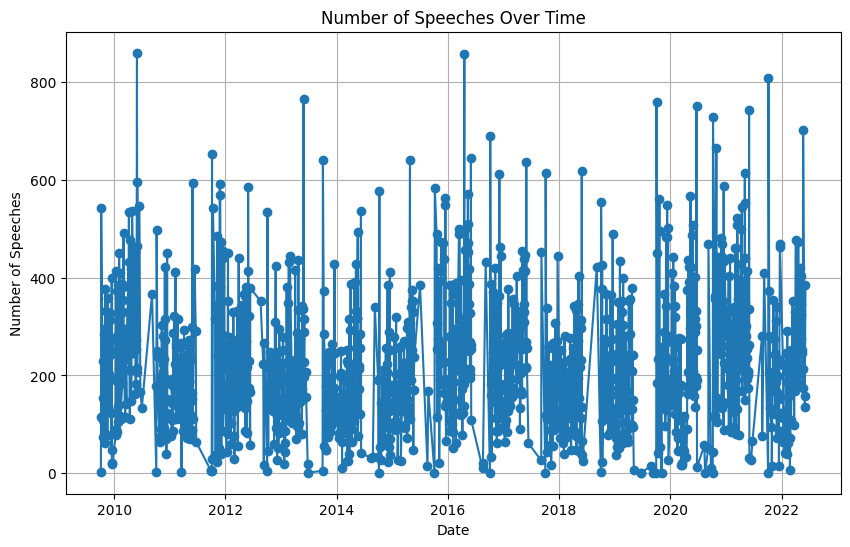

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by date and count speeches
speech_count_by_date = combined_corpus.groupby('Date').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(speech_count_by_date.index, speech_count_by_date.values, marker='o', linestyle='-')
plt.title('Number of Speeches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.grid(True)
plt.show()


# OLD

In [ ]:
# Plot
from utils import plot_simple_adj

plot_simple_adj(df_clean, norm_word_count=True)

